In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('/Users/blacktain/OneDrive - Western Governors University/d206/Junk/e9d8sm5uf8df75k650df/medical_raw_data.csv')
pd.set_option('display.max_columns', 55)

In [3]:
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [4]:
df.drop(["Unnamed: 0","Interaction","UID","CaseOrder"], axis=1, inplace=True)
df["ID"] = pd.Series(range(0,10000))

In [5]:
df.columns

Index(['Customer_id', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng',
       'Population', 'Area', 'Timezone', 'Job', 'Children', 'Age', 'Education',
       'Employment', 'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services', 'Initial_days', 'TotalCharge', 'Additional_charges',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8',
       'ID'],
      dtype='object')

In [6]:
def digitalBool_to_string(s):
    if s == 1.0 or s == "Yes":
        return "Yes"
    elif s == 0.0 or s == "No":
        return "No"
    else:
        return np.nan

df["Anxiety"] = df["Anxiety"].apply(lambda s: digitalBool_to_string(s))
df["Overweight"] = df["Overweight"].apply(lambda s: digitalBool_to_string(s))
df.loc[:,["Anxiety", "Overweight"]]

,Anxiety,Overweight
0,Yes,No
1,NaN,Yes
2,NaN,Yes
3,NaN,No
4,No,No
...,...,...
9995,Yes,NaN
9996,No,Yes
9997,Yes,Yes
9998,No,Yes


# Check for Dupes

In [7]:
df.duplicated().value_counts()

False    10000
dtype: int64

# Consistency in Categorical Names


In [9]:
df["Education"].value_counts()

Regular High School Diploma                 2444
Bachelor's Degree                           1724
Some College, 1 or More Years, No Degree    1484
9th Grade to 12th Grade, No Diploma          832
Associate's Degree                           797
Master's Degree                              701
Some College, Less than 1 Year               642
Nursery School to 8th Grade                  552
GED or Alternative Credential                389
Professional School Degree                   208
No Schooling Completed                       133
Doctorate Degree                              94
Name: Education, dtype: int64

In [11]:
df["Area"].value_counts()

Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64

In [12]:
df["Job"].value_counts()

Outdoor activities/education manager     29
Exhibition designer                      27
Theatre director                         27
Scientist, audiological                  26
Toxicologist                             25
                                         ..
Government social research officer        6
Phytotherapist                            6
Engineer, control and instrumentation     6
Public relations account executive        6
Licensed conveyancer                      6
Name: Job, Length: 639, dtype: int64

In [14]:
len(df["Job"].unique())

639

In [15]:
df["Employment"].unique()

array(['Full Time', 'Retired', 'Unemployed', 'Student', 'Part Time'],
      dtype=object)

In [16]:
df["Marital"].unique()

array(['Divorced', 'Married', 'Widowed', 'Never Married', 'Separated'],
      dtype=object)

In [17]:
df["Complication_risk"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [18]:
df["Services"].unique()

array(['Blood Work', 'Intravenous', 'CT Scan', 'MRI'], dtype=object)

# Missing Values

In [19]:
count_of_null_by_column = df.isnull().sum()
nonzero = count_of_null_by_column > 0
count_of_null_by_column[nonzero]

Children        2588
Age             2414
Income          2464
Soft_drink      2467
Overweight       982
Anxiety          984
Initial_days    1056
dtype: int64

In [20]:
percentage_of_null_by_column = (df.isnull().sum() / 10000) * 100
nonzero = percentage_of_null_by_column > 0

percentage_of_null_by_column[nonzero]

Children        25.88
Age             24.14
Income          24.64
Soft_drink      24.67
Overweight       9.82
Anxiety          9.84
Initial_days    10.56
dtype: float64

# Mitigation of missing variables
Our data set is missing a large amount of data. So, we are required to employ mitigation tactics so that future anylasis is not impacted. The way we will achieve this is:

- The "Overweight","Anxiety", "Soft_drink" columns all contain boolean values of either yes or no. for these columns we will add a third option which we will name "Unknown". The reason for this choice is due to the the large percentage of missing data. Imputing the most common of the boolean values could greatly skew measures of central tendency and imputing yes no values based on known distrabutions would create unwanted noise in the data. The new unknown category may also be its own valid point of interest in the data as patterns may apear aound the missing information.
- "Children","Age", "Income", "Initial_days" For the Income and Inital_Days columns we will impute the median value in the place of missing data. This will allow for statistical anylasis to be preformed. The Children and Age columns will be converted to categorical data because the amount of data missing is not acceptable. This will allow us to avoid discarding the data due to the nearly 25% NaN rate by creating an "Unknown" category.


In [21]:
df.loc[:,["Overweight","Anxiety", "Soft_drink"]].describe()

,Overweight,Anxiety,Soft_drink
count,9018,9016,7533
unique,2,2,2
top,Yes,No,No
freq,6395,6110,5589


In [22]:
df["Overweight"].fillna("Unknown", inplace=True)
df["Anxiety"].fillna("Unknown", inplace=True)
df["Soft_drink"].fillna("Unknown", inplace=True)

In [23]:
percentage_of_null_by_column = (df.isnull().sum() / 10000) * 100
nonzero = percentage_of_null_by_column > 0

percentage_of_null_by_column[nonzero]

Children        25.88
Age             24.14
Income          24.64
Initial_days    10.56
dtype: float64

Mitigation of missing numerical values


In [24]:
df.loc[:,["Children","Age", "Income", "Initial_days"]].describe()

,Children,Age,Income,Initial_days
count,7412.000000,7586.000000,7536.000000,8944.000000
mean,2.098219,53.295676,40484.438268,34.432082
std,2.155427,20.659182,28664.861050,26.287050
min,0.000000,18.000000,154.080000,1.001981
25%,0.000000,35.000000,19450.792500,7.911709
50%,1.000000,53.000000,33942.280000,34.446941
75%,3.000000,71.000000,54075.235000,61.124654
max,10.000000,89.000000,207249.130000,71.981486


In [26]:
df["Income"].fillna(df["Income"].median(), inplace=True)
df["Initial_days"].fillna(df["Initial_days"].median(), inplace=True)

In [27]:
def number_of_children_categories(s):
    if type(s) == str:
        return s
        
    if s == 0:
        return "None"
    elif s <= 2:
        return "1-2"
    elif s < 6:
        return "3-5"
    elif s >= 6:
        return "6+"

# Convert numerical value of children to a categorical value
df["Children"] = df["Children"].apply(lambda s: number_of_children_categories(s))
# replacing missing values in data to "Unknown"
df["Children"].fillna( "Unknown", inplace=True)

# Display Children column to check for desired outcomes
df["Children"]

0           1-2
1           3-5
2           3-5
3          None
4       Unknown
         ...   
9995    Unknown
9996        3-5
9997        3-5
9998        3-5
9999         6+
Name: Children, Length: 10000, dtype: object

In [28]:
# define a function to break down numerical "Age" data into categorical data
def age_to_categories(s):
    if type(s) == str:
        return s
        
    if s < 30:
        return "0-29"
    elif s < 50:
        return "30-49"
    elif s < 70:
        return "50-69"
    elif s >= 70 :
        return "70+"

# Convert numerical value of age to a categorical value
df["Age"] = df["Age"].apply(lambda s: age_to_categories(s))
# replacing missing values in data to "Unknown"
df["Age"].fillna( "Unknown", inplace=True)

# Display Age column to check for desired outcomes
df["Age"]

0         50-69
1         50-69
2         50-69
3           70+
4          0-29
         ...   
9995       0-29
9996        70+
9997    Unknown
9998      30-49
9999    Unknown
Name: Age, Length: 10000, dtype: object

In [29]:
#This code is the same as previously used to show percentages of missing values by rows
#used here to show the sucsess of midigation

# Calculating the percentage of null values in each row
# Filtering out columns that have a count of 0 indicating no null values found
# displaying the percentage of rows with null values by column
percentage_of_null_by_column = (df.isnull().sum() / 10000) * 100
nonzero = percentage_of_null_by_column > 0

percentage_of_null_by_column[nonzero]

Series([], dtype: float64)

### Outliers

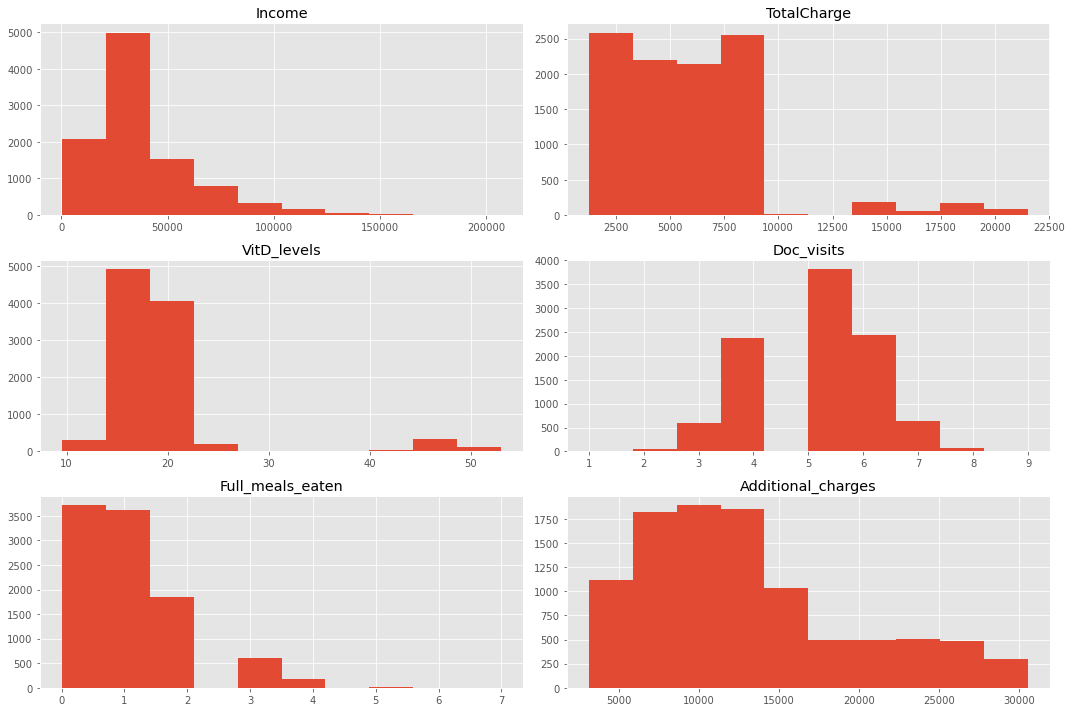

In [31]:
# Create histograms Numerical values to identify outliers
# Using pandas and matplot lib
plots = df[['Income', "TotalCharge","VitD_levels", "Doc_visits", "Full_meals_eaten", "Additional_charges"]].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

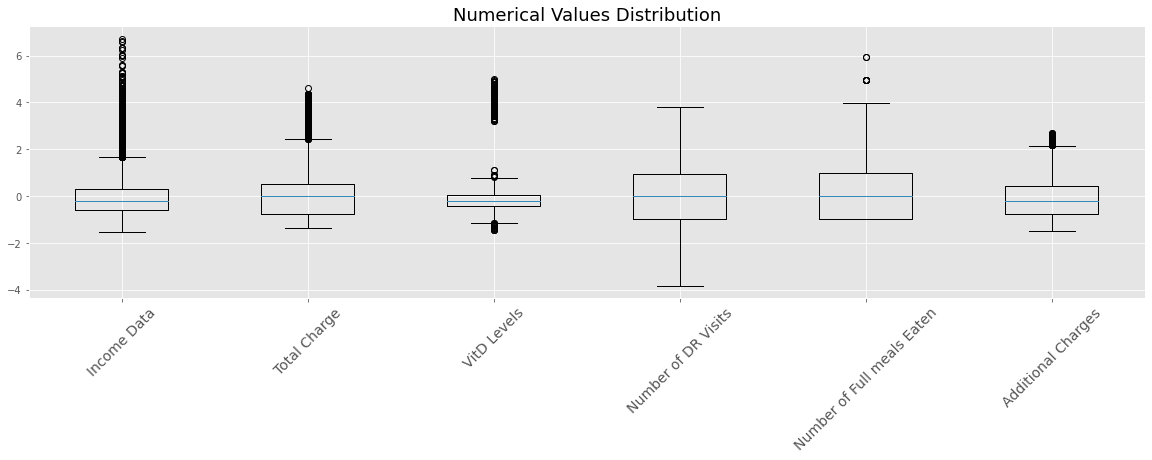

In [32]:
# 1. Standardize all numerical data
# 2. Use Box Plots of all numerical data to observe outliers

std_income_data = (df["Income"] - df["Income"].mean()) /df["Income"].std()
std_total_charge = (df["TotalCharge"] - df["TotalCharge"].mean()) /df["TotalCharge"].std()
std_vitd_data = (df["VitD_levels"] - df["VitD_levels"].mean()) /df["VitD_levels"].std()
std_docvisit_data = (df["Doc_visits"] - df["Doc_visits"].mean()) /df["Doc_visits"].std()
std_Full_meals_eaten = (df["Full_meals_eaten"] - df["Full_meals_eaten"].mean()) /df["Full_meals_eaten"].std()
std_Additional_charges = (df["Additional_charges"] - df["Additional_charges"].mean()) /df["Additional_charges"].std()

plt.figure(figsize=(20,5)) 
plt.title("Numerical Values Distribution", size=18)
plt.boxplot([
    std_income_data,
    std_total_charge,
    std_vitd_data,
    std_docvisit_data,
    std_Full_meals_eaten, # Concerned that this is mearly a function of time in hospital
    std_Additional_charges
]) 
plt.xticks(
    [1,2,3,4,5, 6],
    [
    "Income Data",
    "Total Charge",
    "VitD Levels",
    "Number of DR Visits",
    "Number of Full meals Eaten",
    "Additional Charges"
    ],
    rotation=45,
    size=14
           
)
plt.show()

# Survey Item 
Survey questions can only contain integer values between 1 and 8. This check will determin that no values exist outside of those constraints

In [33]:
# This query shows that all values are accounted for in the "count" row
# the min and max indicates that the max and min value in each row is within the acceptable range

df.loc[:, "Item1":"Item8"].describe().iloc[[0,3,-1]]

,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,8.0,7.0,8.0,7.0,7.0,7.0,7.0,7.0


In [34]:
# this query shows the data type and the counts
df.loc[:, "Item1":"Item8"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Item1   10000 non-null  int64
 1   Item2   10000 non-null  int64
 2   Item3   10000 non-null  int64
 3   Item4   10000 non-null  int64
 4   Item5   10000 non-null  int64
 5   Item6   10000 non-null  int64
 6   Item7   10000 non-null  int64
 7   Item8   10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB


In [35]:
# Extract Clean dataset
df.to_csv('D206_cleaned.csv')

In [36]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [37]:
# separating out numerical data points
numerical_cols = [
    "VitD_levels",
    "VitD_supp",
    "Full_meals_eaten",
    "Doc_visits",
    "Initial_days",
    "TotalCharge",
    "Additional_charges"
] + ["Item1","Item2","Item3","Item4","Item5","Item6","Item7","Item8"]
numerical_df = df.loc[:, numerical_cols]

In [38]:
# normalizing the numerical data
data_normalized = (numerical_df - numerical_df.mean()) / numerical_df.std()
data_normalized.head(3)


,VitD_levels,VitD_supp,Full_meals_eaten,Doc_visits,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,-0.239518,-0.634681,-0.993337,0.944599,-0.959278,-0.799539,0.764967,-0.502730,-0.489648,-1.463173,-1.462054,0.488355,-0.506114,-0.483647,0.470397
1,-0.062177,0.956397,0.990560,-0.967932,-0.776505,-0.496404,0.715078,-0.502730,0.476699,-0.494890,0.467923,0.488355,0.462525,-0.483647,-0.489009
2,-0.296996,-0.634681,-0.001389,-0.967932,-1.193129,-1.099597,0.698600,-1.471754,0.476699,0.473394,0.467923,-0.482337,0.462525,-0.483647,-0.489009


In [39]:
# define number of componants desired
n_components_desired = data_normalized.shape[1]
# extansiated the PCA class
pca = PCA(n_components=n_components_desired)
# fit the data
pca.fit(data_normalized)
# Labeling the PCA component columns
columns=[f"PC{i+1}" for i in range(n_components_desired)]
# displayed a list of the explained varience ration by component
list(pca.explained_variance_ratio_)


[0.19694557519839165,
 0.13003643228100364,
 0.10974258895798643,
 0.06950751213940129,
 0.06771958744174272,
 0.06637469413483778,
 0.0654069996442077,
 0.06448057260443313,
 0.051484024721683785,
 0.046519309700226705,
 0.039244135598235586,
 0.03558135589716114,
 0.03155617758224263,
 0.021824407555206215,
 0.0035766265432396406]

In [40]:
for pc, var in zip(columns, np.cumsum(pca.explained_variance_ratio_)):
    print(pc, var)

PC1 0.19694557519839165
PC2 0.3269820074793953
PC3 0.43672459643738176
PC4 0.506232108576783
PC5 0.5739516960185258
PC6 0.6403263901533636
PC7 0.7057333897975713
PC8 0.7702139624020043
PC9 0.8216979871236881
PC10 0.8682172968239148
PC11 0.9074614324221504
PC12 0.9430427883193115
PC13 0.9745989659015541
PC14 0.9964233734567604
PC15 1.0


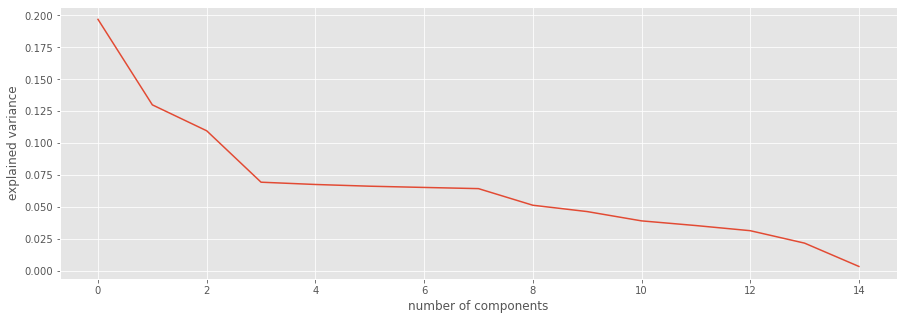

In [42]:
# plot explained variance ration
plt.figure(figsize=(15,5))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

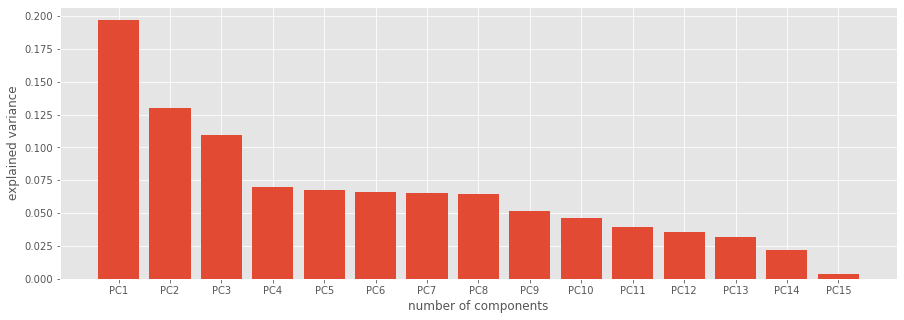

In [41]:
# plot explained variance ration as a bar chart
plt.figure(figsize=(15,5))
plt.bar(columns, pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [42]:
# calculating eigenvalues using numpy array multiplication and list comprehension
cov_matrix = np.dot(data_normalized.T, data_normalized) / data_normalized.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]
eigenvalues

[2.9538882096130417,
 1.9503514295666171,
 1.6459742204863448,
 1.0425084208228037,
 1.0156922322449702,
 0.9955208499813565,
 0.9810068841636407,
 0.9671118682075822,
 0.7721831447881683,
 0.6977198665388444,
 0.5886031677701317,
 0.5336669664235663,
 0.47329532946726194,
 0.3273333767167571,
 0.053644033208779605]

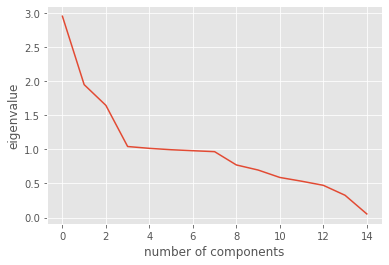

In [43]:
# plotting eigenvalues for better visuilization
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show()


In [44]:
# calculationg the PCA loading values
loadings = pd.DataFrame(pca.components_.T, columns=columns, index=data_normalized.columns)
loadings.iloc[:,0:5]


,PC1,PC2,PC3,PC4,PC5
VitD_levels,-0.009560,0.540957,0.052098,0.358130,0.015282
VitD_supp,-0.005161,0.032064,0.009649,-0.326656,0.622945
Full_meals_eaten,-0.000499,-0.012428,0.020410,0.629819,-0.155030
Doc_visits,0.007094,-0.005071,-0.007725,0.097878,0.562067
Initial_days,-0.020689,0.445543,0.066614,-0.432342,-0.063815
TotalCharge,-0.018678,0.701623,0.082333,0.007896,-0.019172
Additional_charges,0.003902,0.030985,-0.010270,0.411699,0.516559
Item1,0.454809,-0.024702,0.295614,0.006683,0.003015
Item2,0.428522,-0.025244,0.291948,-0.015642,0.005126
Item3,0.395335,-0.024448,0.295314,-0.009022,-0.003486


In [45]:
# transforming PCA data into a useable data frame
pca_data = pd.DataFrame(pca.transform(data_normalized), columns = columns)


In [48]:
# Export pca data with eigenvalue>1 to a new dataframe
pca_data_final = pca_data.iloc[:,0:5]
pca_data_final

,PC1,PC2,PC3,PC4,PC5
0,-1.514425,-1.194578,0.272671,0.321425,0.779842
1,-0.360703,-0.693492,-0.109910,0.820670,0.318910
2,-0.203531,-1.398417,-0.798086,0.783590,-0.497511
3,2.396507,-1.455304,0.354197,0.535375,-0.844118
4,-2.404398,-1.620502,-0.276557,-1.544020,1.110270
...,...,...,...,...,...
9995,-2.112054,0.209656,-0.125961,-0.393089,-0.450468
9996,-0.659645,0.840961,1.505641,-0.069253,0.898850
9997,-1.893514,-0.007652,0.179145,0.718807,-0.915463
9998,0.819565,1.173406,0.998508,-0.370188,-0.039006
